# Frontal Detection Analysis (overlayclimate fields on frontal ID maps)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file_path = "/glade/work/kdagon/FrontDetector/CESMOutputs/"

In [3]:
fronts_file = "cesm_fronts_2000-2005.nc"
onehot_file = "cesm_frontsOneHot_2000-2005.nc"
rates_file = "cesm_frontRates_2000-2005.nc"

## Read in predicted fronts file

In [ ]:
pred_fronts = xr.open_dataset(file_path+fronts_file)

In [ ]:
pfronts = pred_fronts.predicted_fronts

## Read in "onehot" fronts file

In [4]:
onehot = xr.open_dataset(file_path+onehot_file)

In [5]:
fronts = onehot.fronts
fronts

<xarray.DataArray 'fronts' (time: 17520, front: 5, lat: 68, lon: 141)>
[839908800 values with dtype=float32]
Coordinates:
  * time        (time) object 2000-01-01 03:00:00 ... 2006-01-01 00:00:00
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon         (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
    front_type  (front) object ...
Dimensions without coordinates: front
Attributes:
    long_name:     one-hot predicted fronts
    grid_mapping:  crs
    valid_min:     0
    valid_max:     1

In [6]:
%%time
allfronts = fronts.argmax(dim='front')

CPU times: user 9.9 s, sys: 26.6 s, total: 36.5 s
Wall time: 2min 8s


In [7]:
allfronts

<xarray.DataArray 'fronts' (time: 17520, lat: 68, lon: 141)>
array([[[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       ...,

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]]])
Coordinates:
  * time     (time) object 2000-01-01 03:00:00 ... 2006-01-01 00:00:00
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 73.0 74.0 75.0 76.0 77.0
  * lon      (lon) float64 189.0 190.0 191.0 192.0 ... 326.0 327.0 328.0 329.0

In [ ]:
# average for each year
#allfronts.groupby("time.year").mean(dim="time")

## Read in sea level pressure field

In [9]:
# need to be on casper to open this folder
cesm_file_path = "/glade/campaign/cgd/ccr/kdagon/dlfront/B20TRC5CN/"

In [8]:
PSL = xr.open_mfdataset(cesm_file_path+'*PSL*', combine='by_coords')

In [9]:
SLP = PSL.PSL

## Read in precipitation field

In [10]:
cesm_file_path = "/glade/campaign/cgd/ccr/kdagon/dlfront/B20TRC5CN/" # need to be on casper, CESM historical output

In [9]:
# h4.PRECT is 3hrly instantaneous
# remapped from unstructured grid to FV (still 1/4 degree so will not completely match frontal ID)
PRECT_samp_file = "b.e13.B20TRC5CN.ne120_g16.003.cam.h4.PRECT.2000010100Z-2000123121Z.FV.nc"

In [11]:
PRECT = xr.open_dataset(cesm_file_path+PRECT_samp_file)

In [12]:
PRECT

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 768, lev: 30, lon: 1152, nbnd: 2, slat: 767, slon: 1152, time: 2920)
Coordinates:
  * lat           (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.53 89.77 90.0
  * lon           (lon) float64 0.0 0.3125 0.625 0.9375 ... 359.1 359.4 359.7
  * slat          (slat) float64 -89.88 -89.65 -89.41 ... 89.41 89.65 89.88
  * slon          (slon) float64 0.0 0.1562 0.4688 0.7812 ... 358.9 359.2 359.5
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * time          (time) object 2000-01-01 03:00:00 ... 2001-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    w_stag        (slat) float64 ...
    lat_bnds      (lat, nbnd) float64 ...
    lon_bnds      (lon, nbnd) float64 ...
    gw            (lat) float64 ...
    area          (lat, lon) float64 ...
    P0            float64 ...
    PRECT         (time, lat, lon) float32 ...
    ch4vmr        (time) float64 ...
    co2vmr        (time) float64 ...
    date          (time) int32 ...
    date_written  (time) |S8 ...
    datesec       (time) int32 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    hyai          (ilev) float64 ...
    hyam          (lev) float64 ...
    hybi          (ilev) float64 ...
    hybm          (lev) float64 ...
    mdt           int32 ...
    n2ovmr        (time) float64 ...
    nbdate        int32 ...
    nbsec         int32 ...
    ndbase        int32 ...
    ndcur         (time) int32 ...
    nsbase        int32 ...
    nscur         (time) int32 ...
    nsteph        (time) int32 ...
    ntrk          int32 ...
    ntrm          int32 ...
    ntrn          int32 ...
    sol_tsi       (time) float64 ...
    time_bnds     (time, nbnd) object ...
    time_written  (time) |S8 ...
Attributes:
    np:               4
    ne:               120
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B20TRC5CN.ne120_g16.003
    title:            UNSET
    logname:          
    host:             
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /projects/ccsm/inputdata/atm/cam/inic/homme/cami-mam3_0...
    topography_file:  /projects/ccsm/inputdata/atm/cam/topo/USGS-gtopo30_ne12...
    history:          Tue Nov 17 14:40:22 2020: ncks -O -t 2 --no_tmp_fl --ga...
    remap_script:     ncremap
    remap_command:    '/glade/u/apps/dav/opt/nco/4.7.9/gnu/8.3.0/bin/ncremap ...
    remap_hostname:   casper-login2
    remap_version:    4.7.9
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    map_file:         /glade/work/nanr/mapfiles/map_ne120_to_0.23x0.31_biline...
    input_file:       /glade/campaign/cgd/ccr/jet/nanr_forKatie/3hrly/b.e13.B...

In [13]:
# subset North America to match DL-Front domain
PRECT_NA = PRECT.sel(lat=slice(10,77),lon=slice(189,329))

In [14]:
# grab a dataarray
PRECT_NA_da = PRECT_NA.PRECT
PRECT_NA_da

<xarray.DataArray 'PRECT' (time: 2920, lat: 285, lon: 448)>
[372825600 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 10.21 10.44 10.68 10.91 ... 76.15 76.39 76.62 76.86
  * lon      (lon) float64 189.1 189.4 189.7 190.0 ... 327.8 328.1 328.4 328.8
  * time     (time) object 2000-01-01 03:00:00 ... 2001-01-01 00:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_measures:  area: area

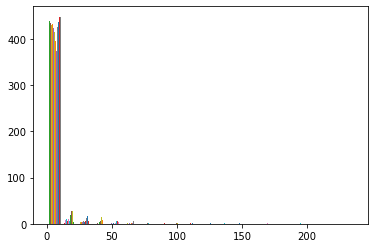

In [15]:
# quick histogram of prect values, first time point (mm/day)
plt.hist(PRECT_NA_da[0,:,:]*1000*86400, bins=20);

## Read in TMQ field

In [57]:
cesm_file_path_ne120_6hrly = "/glade/campaign/cgd/ccr/jet/nanr_forKatie/6hrly/b.e13.B20TRC5CN.ne120_g16.003/"

In [58]:
# 6hrly output only
# remapped from unstructured grid to FV (still 1/4 degree)
TMQ_samp_file = "b.e13.B20TRC5CN.ne120_g16.003.cam.h2.TMQ.2000010100Z-2000123118Z.FV.nc"

In [59]:
TMQ = xr.open_dataset(cesm_file_path_ne120_6hrly+TMQ_samp_file)

In [82]:
TMQ_NA = TMQ.sel(lat=slice(10,77),lon=slice(189,329))
TMQ_NA_da = TMQ_NA.TMQ
#TMQ_NA_da

## Superimpose two fields

In [16]:
import matplotlib.colors 
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib import cm
import cartopy.feature as cfeature

In [17]:
# making a custom fronts colorbar with blue for cold, red for warm, grey for stationary, 
# purple for occluded, and white for none fronts.

cmap_all = matplotlib.colors.ListedColormap(['blue', 'red', 'grey', 'purple', 'w'])
bounds = [0, 0.99, 1.99, 2.99, 3.99, 4.99]
norm_all = matplotlib.colors.BoundaryNorm(bounds, cmap_all.N)

## PSL overlay

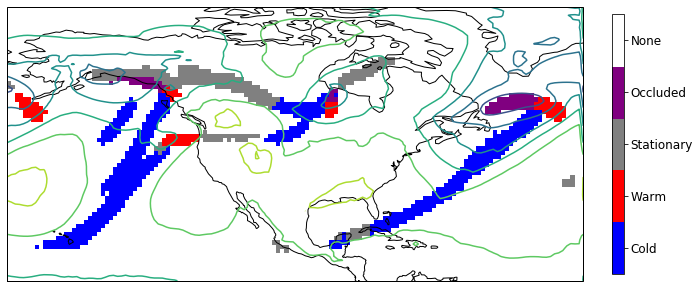

In [20]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())

# start with the first time index
field, lon = add_cyclic_point(allfronts[0,:,:], coord=allfronts.lon)
lat = allfronts.lat
cf = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

field, lon = add_cyclic_point(SLP[0,:,:], coord=SLP.lon)
c = ax.contour(lon, lat, field, transform=ccrs.PlateCarree())

ax.coastlines()

import matplotlib as mpl
cbar_ax = fig.add_axes([1.05, 0.2, 0.02, 0.6])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

### Select a specific time point

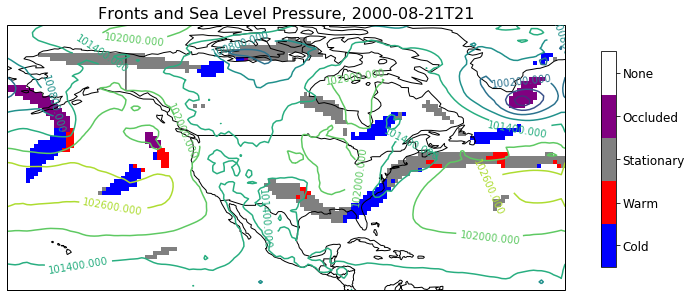

In [42]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T21'

field, lon = add_cyclic_point(allfronts.sel(time=t)[0], coord=allfronts.lon)
lat = allfronts.lat
cf = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

pfield = SLP.sel(time=t)[0]
field, lon = add_cyclic_point(pfield, coord=SLP.lon)
lat = SLP.lat
cf_psl = ax.contour(lon, lat, field, transform=ccrs.PlateCarree())
ax.clabel(cf_psl, inline=1, fontsize=10)

# fronts colorbar
cbar_ax = fig.add_axes([0.95, 0.35, 0.02, 0.3])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

# add title
ax.set_title('Fronts and Sea Level Pressure, '+t, fontsize=16);

## PRECT Overlay

In [18]:
t = '2000-02-17T21' # 21 UTC = 2pm MT
tindex = PRECT_NA_da.sel(time=t)[0]
tindex

<xarray.DataArray 'PRECT' (lat: 285, lon: 448)>
[127680 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 10.21 10.44 10.68 10.91 ... 76.15 76.39 76.62 76.86
  * lon      (lon) float64 189.1 189.4 189.7 190.0 ... 327.8 328.1 328.4 328.8
    time     object 2000-02-17 21:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_measures:  area: area

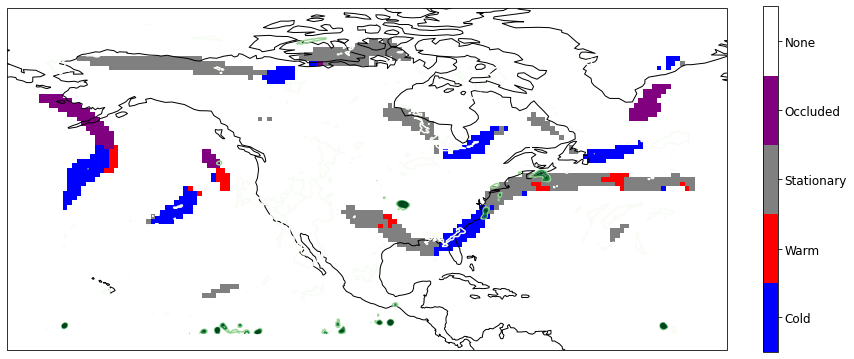

In [19]:
# PRECT overlay
fig = plt.figure(figsize=(10,8))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T21'

field, lon = add_cyclic_point(allfronts.sel(time=t)[0], coord=allfronts.lon)
lat = allfronts.lat
cf = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

pfield = PRECT_NA_da.sel(time=t)[0]*1000*86400 # convert from m/s -> mm/day
field, lon = add_cyclic_point(pfield, coord=PRECT_NA.lon)
lat = PRECT_NA.lat
c = ax.contour(lon, lat, field, cmap=cm.Greens, vmin=0, vmax=200, transform=ccrs.PlateCarree())

ax.coastlines()

import matplotlib as mpl
cbar_ax = fig.add_axes([1.05, 0.2, 0.02, 0.6])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

### Custom precip colormap from unidata
https://unidata.github.io/python-gallery/examples/Precipitation_Map.html

In [20]:
# modified lower clevs to be less noisy
import matplotlib.colors as mcolors
clevs = [0, 4, 4.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap_prec = mcolors.ListedColormap(cmap_data, 'precipitation')
norm_prec = mcolors.BoundaryNorm(clevs, cmap_prec.N)

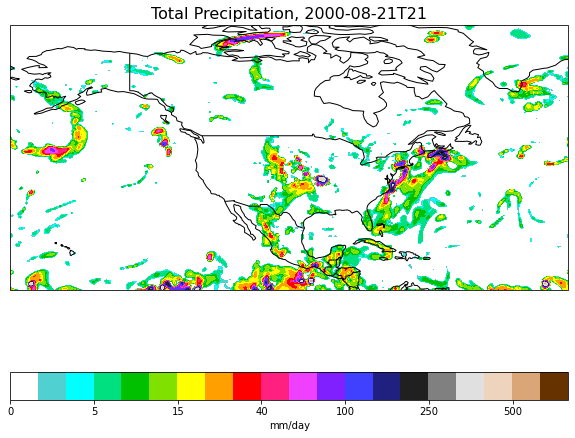

In [21]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.STATES)

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T21'

pfield = PRECT_NA_da.sel(time=t)[0]*1000*86400 # convert from m/s -> mm/day
field, lon = add_cyclic_point(pfield, coord=PRECT_NA.lon)
lat = PRECT_NA.lat
cf = ax.contourf(lon, lat, field, clevs, cmap=cmap_prec, norm=norm_prec, transform=ccrs.PlateCarree())

# add colorbar
cbar = plt.colorbar(cf, orientation='horizontal')
cbar.set_label('mm/day')

# add title
ax.set_title('Total Precipitation, '+t, fontsize=16);

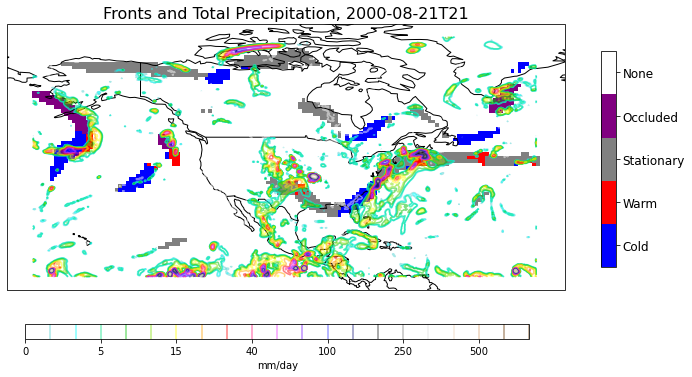

In [22]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T21'

field, lon = add_cyclic_point(allfronts.sel(time=t)[0], coord=allfronts.lon)
lat = allfronts.lat
cf = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

pfield = PRECT_NA_da.sel(time=t)[0]*1000*86400 # convert from m/s -> mm/day
field, lon = add_cyclic_point(pfield, coord=PRECT_NA.lon)
lat = PRECT_NA.lat
cf_prec = ax.contour(lon, lat, field, clevs, cmap=cmap_prec, norm=norm_prec, transform=ccrs.PlateCarree(), alpha=0.5)
#ax.clabel(cf_prec, inline=1, fontsize=10)

# fronts colorbar
cbar_ax = fig.add_axes([0.95, 0.35, 0.02, 0.3])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

# prect colorbar
cbar_prec_ax = fig.add_axes([0.15, 0.25, 0.7, 0.02])
cbar_prec = plt.colorbar(cf_prec, cax=cbar_prec_ax, orientation='horizontal', alpha=0.9)
cbar_prec.set_label('mm/day')

# add title
ax.set_title('Fronts and Total Precipitation, '+t, fontsize=16);

#plt.savefig('allfronts_PRECT_CESM_2000-08-21-21.pdf', bbox_inches='tight')

### Create (but don't plot) PRECT filled contour to get filled colorbar

In [23]:
pfield = PRECT_NA_da.sel(time=t)[0]*1000*86400 # convert from m/s -> mm/day
field, lon = add_cyclic_point(pfield, coord=PRECT_NA.lon)
lat = PRECT_NA.lat
cf_prec = ax.contourf(lon, lat, field, clevs, cmap=cmap_prec, norm=norm_prec, transform=ccrs.PlateCarree())
plt.close()

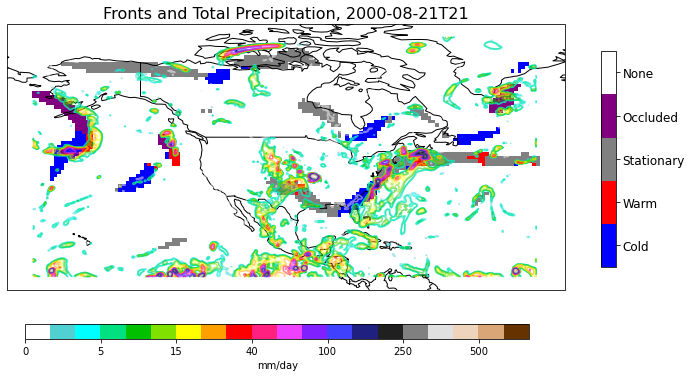

In [24]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T21'

field, lon = add_cyclic_point(allfronts.sel(time=t)[0], coord=allfronts.lon)
lat = allfronts.lat
cf_fronts = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

pfield = PRECT_NA_da.sel(time=t)[0]*1000*86400 # convert from m/s -> mm/day
field, lon = add_cyclic_point(pfield, coord=PRECT_NA.lon)
lat = PRECT_NA.lat
c_prec = ax.contour(lon, lat, field, clevs, cmap=cmap_prec, norm=norm_prec, transform=ccrs.PlateCarree(), alpha=0.5)
#ax.clabel(cf_prec, inline=1, fontsize=10)

# fronts colorbar
cbar_ax = fig.add_axes([0.95, 0.35, 0.02, 0.3])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

# precip colorbar - reference mock plot
cbar_prec_ax = fig.add_axes([0.15, 0.25, 0.7, 0.02])
cbar_prec = plt.colorbar(cf_prec, cax=cbar_prec_ax, orientation='horizontal')
cbar_prec.set_label('mm/day')

# add title
ax.set_title('Fronts and Total Precipitation, '+t, fontsize=16);

#plt.savefig('allfronts_PRECT_CESM_2000-08-21-21_cbar.pdf', bbox_inches='tight')

## Visualize extreme precipitation

Compute the 90th percentile for each grid point\
Where percentile samples a year of model output (need to sample more model years)

In [26]:
%%time
p90 = PRECT_NA_da.quantile(0.9, dim='time')

CPU times: user 18.4 s, sys: 2.05 s, total: 20.4 s
Wall time: 20.8 s


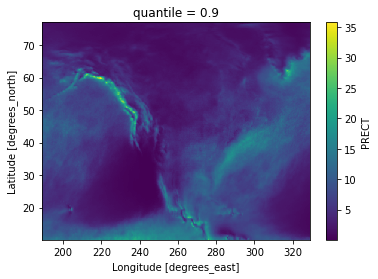

In [27]:
p90_mm = p90*86400*1000 # convert to mm/day
p90_mm.plot();

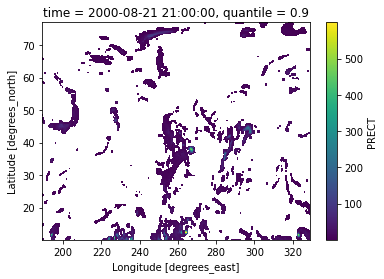

In [28]:
# Select gridpoints where prect at a given time is greater than p90
pfield = PRECT_NA_da.sel(time=t)[0]*1000*86400
PEx = pfield.where(pfield > p90_mm)
PEx.plot();

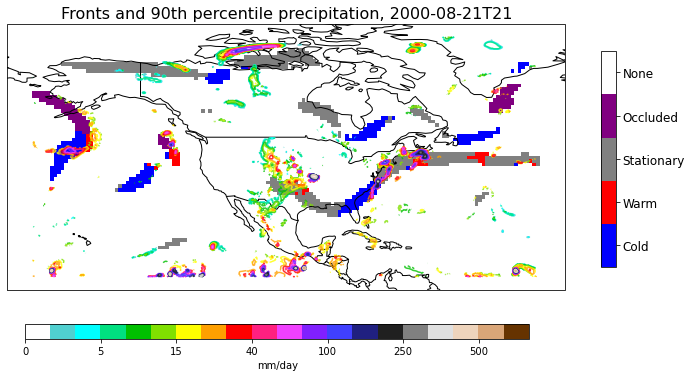

In [29]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T21'

field, lon = add_cyclic_point(allfronts.sel(time=t)[0], coord=allfronts.lon)
lat = allfronts.lat
cf_fronts = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

psel = PRECT_NA_da.sel(time=t)[0]*1000*86400
pfield = psel.where(psel > p90_mm)
field, lon = add_cyclic_point(pfield, coord=PRECT_NA.lon)
lat = PRECT_NA.lat
c_prec = ax.contour(lon, lat, field, clevs, cmap=cmap_prec, norm=norm_prec, transform=ccrs.PlateCarree(), alpha=0.8)
#ax.clabel(cf_prec, inline=1, fontsize=10)

# fronts colorbar
cbar_ax = fig.add_axes([0.95, 0.35, 0.02, 0.3])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

# precip colorbar - reference mock plot
cbar_prec_ax = fig.add_axes([0.15, 0.25, 0.7, 0.02])
cbar_prec = plt.colorbar(cf_prec, cax=cbar_prec_ax, orientation='horizontal')
cbar_prec.set_label('mm/day')

# add title
ax.set_title('Fronts and 90th percentile precipitation, '+t, fontsize=16);

#plt.savefig('allfronts_P90_CESM_2000-08-21-21.pdf', bbox_inches='tight')

## TMQ overlay

In [73]:
# TMQ is 6hrly, so need to be careful with selecting time point
TMQ_NA_da.sel(time="2000-08-21").time

<xarray.DataArray 'time' (time: 4)>
array([cftime.DatetimeNoLeap(2000, 8, 21, 0, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 6, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 12, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 18, 0, 0, 0, 6, 233)], dtype=object)
Coordinates:
  * time     (time) object 2000-08-21 00:00:00 ... 2000-08-21 18:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [74]:
allfronts.sel(time="2000-08-21").time

<xarray.DataArray 'time' (time: 8)>
array([cftime.DatetimeNoLeap(2000, 8, 21, 0, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 3, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 6, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 9, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 12, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 15, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 18, 0, 0, 0, 6, 233),
       cftime.DatetimeNoLeap(2000, 8, 21, 21, 0, 0, 0, 6, 233)], dtype=object)
Coordinates:
  * time     (time) object 2000-08-21 00:00:00 ... 2000-08-21 21:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

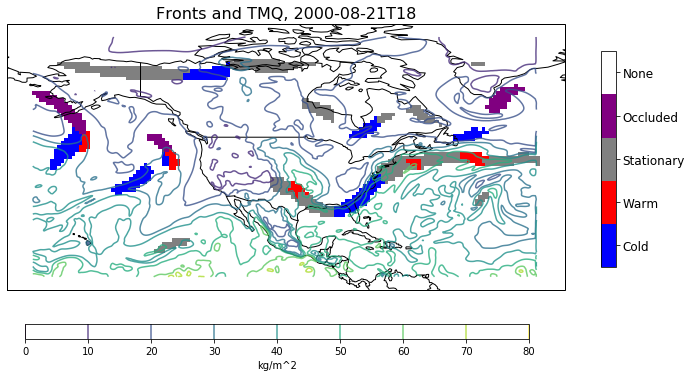

In [93]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# select time index
#t = '2000-07-05T12'
t = '2000-08-21T18'

field, lon = add_cyclic_point(allfronts.sel(time=t)[0], coord=allfronts.lon)
lat = allfronts.lat
cf = ax.pcolormesh(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, norm=norm_all, transform=ccrs.PlateCarree())

pfield = TMQ_NA_da.sel(time=t)[0]
field, lon = add_cyclic_point(pfield, coord=TMQ_NA.lon)
lat = TMQ_NA.lat
cf_tmq = ax.contour(lon, lat, field, transform=ccrs.PlateCarree(), alpha=0.8)
#ax.clabel(cf_psl, inline=1, fontsize=10)

# fronts colorbar
cbar_ax = fig.add_axes([0.95, 0.35, 0.02, 0.3])
norm_all_cb = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm_all_cb,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

# tmq colorbar
cbar_tmq_ax = fig.add_axes([0.15, 0.25, 0.7, 0.02])
cbar_tmq = plt.colorbar(cf_tmq, cax=cbar_tmq_ax, orientation='horizontal')
cbar_tmq.set_label('kg/m^2')

# add title
ax.set_title('Fronts and TMQ, '+t, fontsize=16);